# Dataset analysis 

In [1]:
import numpy as np
import math
import pandas as pd
import os.path
import matplotlib.pyplot as plt
from typing import List, Dict
from PIL import Image
import seaborn as sns
import json
from matplotlib import cm
from pprint import pformat
import json
import cv2
import tikzplotlib

from sklearn.metrics import confusion_matrix


plt.style.use("seaborn")
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [2]:
colormap = cm.get_cmap('gist_stern_r')

print([f'class {i} : colormap {colormap(i*51)}' for i in range(6)])

['class 0 : colormap (1.0, 1.0, 1.0, 1.0)', 'class 1 : colormap (0.8, 0.8, 0.24528301886792458, 1.0)', 'class 2 : colormap (0.6, 0.6, 0.5744680851063829, 1.0)', 'class 3 : colormap (0.3999999999999999, 0.4, 0.8, 1.0)', 'class 4 : colormap (0.27610394265232974, 0.19999999999999996, 0.4, 1.0)', 'class 5 : colormap (0.0, 0.0, 0.0, 1.0)']


In [3]:

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

In [4]:
def illustrate_mask(dataset:str, source:str, image_nr:int, slice_nr:int, F_points = False, base_path = r'/media/jan/DataStorage/ProjectData/temp/') :
    image_path = os.path.join(base_path, dataset, f'{source}_images', f'image{image_nr:03d}', f'slice_{slice_nr:03d}.jpg')
    mask_path = os.path.join(base_path, dataset,  f'{source}_masks', f'image{image_nr:03d}', f'slice_{slice_nr:03d}.npy')

    im = Image.open(image_path)
    mask = np.load(mask_path)

    if F_points:
        points_path = os.path.join(base_path, dataset,  f'{source}_masks', f'image{image_nr:03d}', f'slice_{slice_nr:03d}_points.npy')
        points = np.load(points_path)

    mask_im = Image.fromarray(np.uint8(cm.gist_stern_r(mask*51)*255)).convert('RGB')
    mask_im = cv2.addWeighted(np.array(im), 0.3,np.array(mask_im), 0.7, 0)

    if F_points: 
        fig = plt.figure(figsize=(10,10))
        cols = 3
    else :
        fig = plt.figure(figsize=(10,10))
        cols = 2
    plt.subplot(1,cols,1)
    plt.title('image slice')
    plt.imshow(np.asarray(im))
    plt.grid(False)
    plt.subplot(1,cols,2)
    plt.imshow(mask_im)
    plt.title('Ground truth mask')
    plt.grid(False)
    if F_points:
        im = cv2.addWeighted(np.array(im), 0.3,np.ones_like(np.array(im)) * 255, 0.7, 0)
        cmap = cm.get_cmap('gist_stern_r')

        for label_num in range(6):
            y_c, x_c = np.where(points == label_num)
            colour = tuple([c * 255 for c in cmap(label_num*51)])

            for y_i, x_i in zip(y_c, x_c):
                im = cv2.circle(im, (x_i, y_i), 2, colour, -1)
        plt.subplot(1,cols,3)
        plt.imshow(im)
        plt.grid(False)
        plt.title('Point annotation')
    return fig

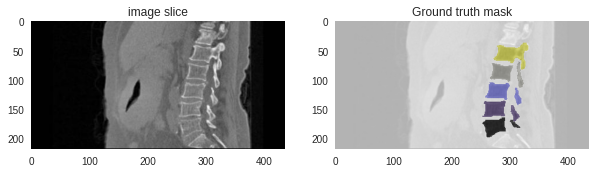

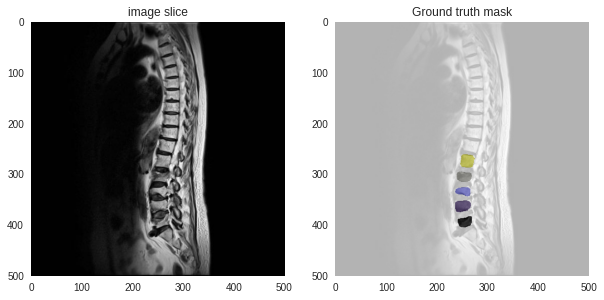

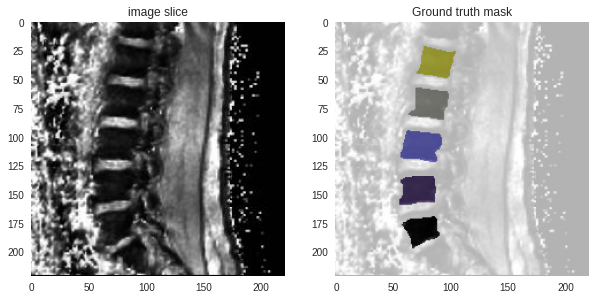

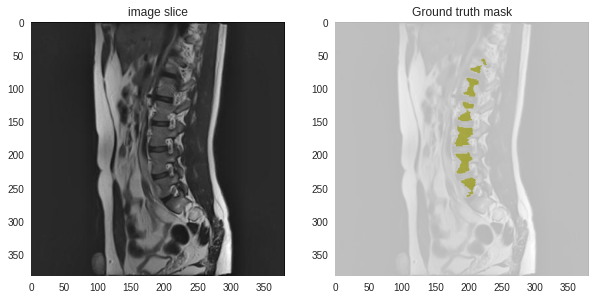

In [5]:
f = illustrate_mask(r'dataset_2_contrast_3', r'xVertSeg', 4, 210)
plt.savefig('xVertSeg004_s210_mask.pdf', bbox_inches = 'tight')

f = illustrate_mask(r'dataset_2_contrast_3', r'USiegen', 4, 20)
plt.savefig('USiegen004_s20_mask.pdf', bbox_inches = 'tight')

f = illustrate_mask(r'dataset_2_contrast_3', r'MyoSegmenTUM', 20, 21)
plt.savefig('MyoSegmenTUM020_s21_mask.pdf', bbox_inches = 'tight')

f = illustrate_mask(r'dataset_2_contrast_3', r'PLoS', 8, 21)
plt.savefig('PLoS_s8_mask.pdf', bbox_inches = 'tight')

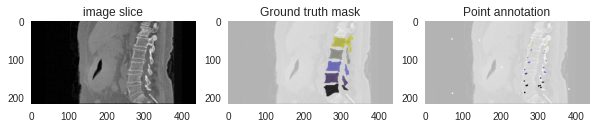

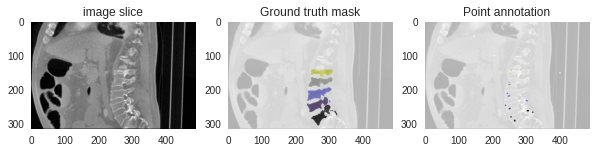

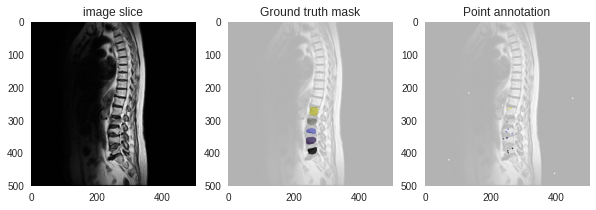

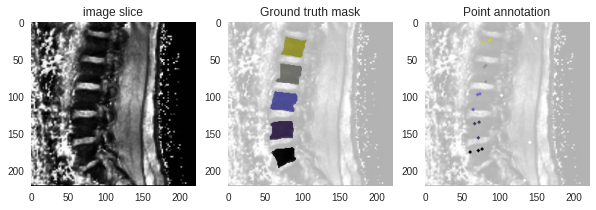

In [6]:
f = illustrate_mask(r'dataset_2_contrast_3', r'xVertSeg', 4, 210, F_points = True)
plt.savefig('xVertSeg004_s210_points.pdf', bbox_inches = 'tight')

f = illustrate_mask(r'dataset_2_contrast_3', r'xVertSeg', 7, 210, F_points = True)
plt.savefig('xVertSeg007_s210_points.pdf', bbox_inches = 'tight')

f = illustrate_mask(r'dataset_2_contrast_3', r'USiegen', 4, 20, F_points=True)
plt.savefig('USiegen004_s20_points.pdf', bbox_inches = 'tight')

f = illustrate_mask(r'dataset_2_contrast_3', r'MyoSegmenTUM', 20, 21, F_points=True)
plt.savefig('MyoSegmenTUM020_s21_points.pdf', bbox_inches = 'tight')

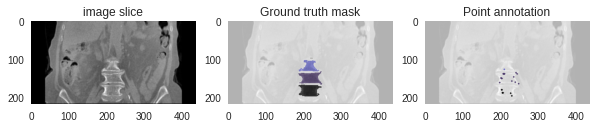

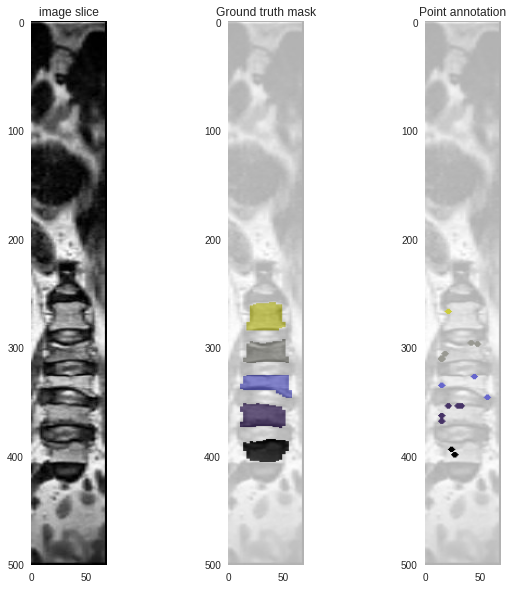

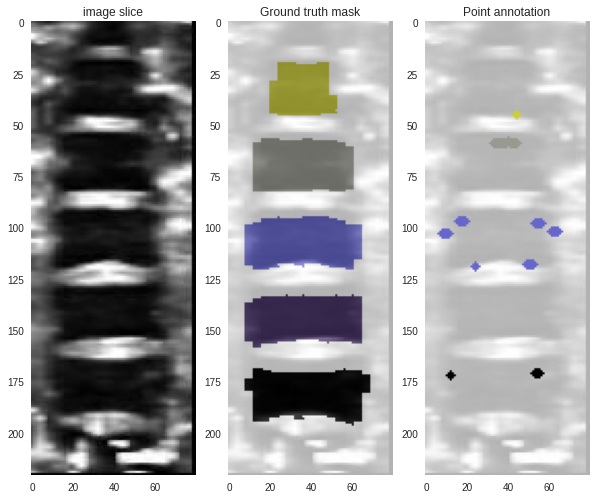

In [7]:
f = illustrate_mask(r'dataset_1_contrast_3', r'xVertSeg', 4, 265, F_points = True)
plt.savefig('xVertSeg004_s265_front_points.pdf', bbox_inches = 'tight')

f = illustrate_mask(r'dataset_1_contrast_3', r'USiegen', 4, 250, F_points=True)
plt.savefig('USiegen004_s250_front_points.pdf', bbox_inches = 'tight')

f = illustrate_mask(r'dataset_1_contrast_3', r'MyoSegmenTUM', 20, 75, F_points=True)
plt.savefig('MyoSegmenTUM020_s75_front_points.pdf', bbox_inches = 'tight')

In [8]:
def confusion_matrix_testset(result_folder):
    base_path = r'/media/jan/DataStorage/ProjectData/temp/'
    dataset = r'dataset_2_contrast_3'

    results_folder = os.path.join(base_path, result_folder, 'dimension_2_split_test')
    conf_matr = np.zeros((6,6))
    for scan in os.listdir(results_folder):
        if not scan.endswith('.npy'):
            continue
        print(scan)
        _, source, image_nr, _ = scan.split('_')
        mask_path = os.path.join(base_path, dataset,  f'{source}_masks', f'image{image_nr}', 'mask_array.npy')
        result_path = os.path.join(base_path, result_folder,  'dimension_2_split_test', f'scan_{source}_{image_nr}_res.npy')

        result = np.load(result_path).astype('uint8')
        mask = np.load(mask_path).astype('uint8')

        conf_matr += confusion_matrix(mask.reshape(-1), result.reshape(-1), labels=[i for i in range(6)])

    conf_matr /= conf_matr.astype('float').sum(axis = 0)
    return np.around(conf_matr * 100, decimals=1)

full_conf = confusion_matrix_testset(r'reconstruct_full')
pseudo_conf = confusion_matrix_testset(r'reconstruct_pseudo')

pd.DataFrame(full_conf).to_csv("full_conf_matrix.csv")
pd.DataFrame(pseudo_conf).to_csv("pseudo_conf_matrix.csv")

scan_USiegen_011_res.npy
scan_MyoSegmenTUM_024_res.npy
scan_MyoSegmenTUM_049_res.npy
scan_MyoSegmenTUM_051_res.npy
scan_xVertSeg_011_res.npy
scan_xVertSeg_014_res.npy
scan_MyoSegmenTUM_022_res.npy
scan_MyoSegmenTUM_012_res.npy
scan_MyoSegmenTUM_006_res.npy
scan_USiegen_012_res.npy
scan_MyoSegmenTUM_011_res.npy
scan_MyoSegmenTUM_002_res.npy
scan_MyoSegmenTUM_035_res.npy
scan_USiegen_011_res.npy
scan_MyoSegmenTUM_024_res.npy
scan_MyoSegmenTUM_049_res.npy
scan_MyoSegmenTUM_051_res.npy
scan_xVertSeg_011_res.npy
scan_xVertSeg_014_res.npy
scan_MyoSegmenTUM_022_res.npy
scan_MyoSegmenTUM_012_res.npy
scan_MyoSegmenTUM_006_res.npy
scan_USiegen_012_res.npy
scan_MyoSegmenTUM_011_res.npy
scan_MyoSegmenTUM_002_res.npy
scan_MyoSegmenTUM_035_res.npy


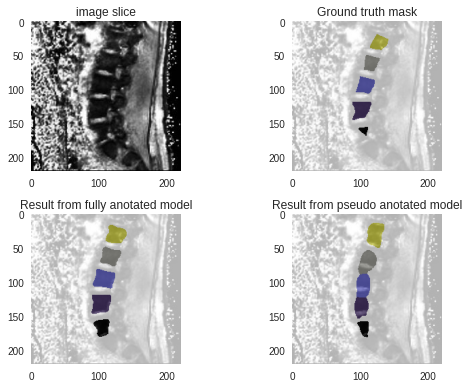

In [9]:
base_path = r'/media/jan/DataStorage/ProjectData/temp/'
result_folder_full = r'reconstruct_full'
result_folder_pseudo = r'reconstruct_pseudo'
dataset = r'dataset_2_contrast_3'
source = r'MyoSegmenTUM'
image_nr = 24
slice_nr = 23


mask_path = os.path.join(base_path, dataset,  f'{source}_masks', f'image{image_nr:03d}', 'mask_array.npy')
result_path_full = os.path.join(base_path, result_folder_full,  'dimension_2_split_test', f'scan_{source}_{image_nr:03d}_res.npy')
result_path_pseudo = os.path.join(base_path, result_folder_pseudo,  'dimension_2_split_test', f'scan_{source}_{image_nr:03d}_res.npy')
image_path = os.path.join(base_path, dataset, f'{source}_images', f'image{image_nr:03d}', f'slice_{slice_nr:03d}.jpg')


im = Image.open(image_path)
mask = np.take(np.load(mask_path), slice_nr, axis=2)
result_full = np.take(np.load(result_path_full), slice_nr, axis=2)
result_pseudo = np.take(np.load(result_path_pseudo), slice_nr, axis=2)

mask_im = Image.fromarray(np.uint8(cm.gist_stern_r(mask*51)*255)).convert('RGB')
mask_im = cv2.addWeighted(np.array(im), 0.3,np.array(mask_im), 0.7, 0)

result_full_im = Image.fromarray(np.uint8(cm.gist_stern_r(result_full*51)*255)).convert('RGB')
result_full_im = cv2.addWeighted(np.array(im), 0.3,np.array(result_full_im), 0.7, 0)

result_pseudo_im = Image.fromarray(np.uint8(cm.gist_stern_r(result_pseudo*51)*255)).convert('RGB')
result_pseudo_im = cv2.addWeighted(np.array(im), 0.3,np.array(result_pseudo_im), 0.7, 0)


plt.subplot(2,2,1)
plt.title('image slice')
plt.imshow(np.asarray(im))
plt.grid(False)
plt.subplot(2,2,2)
plt.imshow(mask_im)
plt.grid(False)
plt.title('Ground truth mask')
plt.subplot(2,2,3)
plt.imshow(result_full_im)
plt.grid(False)
plt.title('Result from fully anotated model')
plt.subplot(2,2,4)
plt.imshow(result_pseudo_im)
plt.grid(False)
plt.title('Result from pseudo anotated model')
plt.tight_layout()

plt.savefig(f'fullvsPseudo_{source}_{image_nr:03d}_{slice_nr:03d}.pdf', bbox_inches = 'tight')

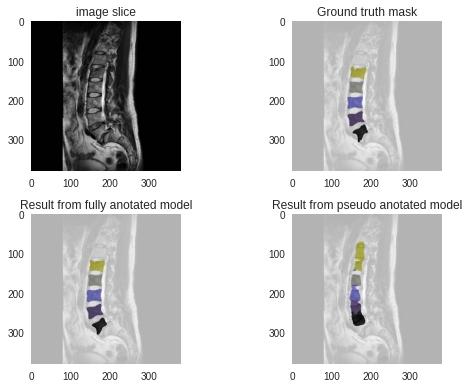

In [10]:
base_path = r'/media/jan/DataStorage/ProjectData/temp/'
result_folder_full = r'reconstruct_full'
result_folder_pseudo = r'reconstruct_pseudo'
dataset = r'dataset_2_contrast_3'
source = r'USiegen'
image_nr = 12
slice_nr = 24


mask_path = os.path.join(base_path, dataset,  f'{source}_masks', f'image{image_nr:03d}', 'mask_array.npy')
result_path_full = os.path.join(base_path, result_folder_full,  'dimension_2_split_test', f'scan_{source}_{image_nr:03d}_res.npy')
result_path_pseudo = os.path.join(base_path, result_folder_pseudo,  'dimension_2_split_test', f'scan_{source}_{image_nr:03d}_res.npy')
image_path = os.path.join(base_path, dataset, f'{source}_images', f'image{image_nr:03d}', f'slice_{slice_nr:03d}.jpg')


im = Image.open(image_path)
mask = np.take(np.load(mask_path), slice_nr, axis=2)
result_full = np.take(np.load(result_path_full), slice_nr, axis=2)
result_pseudo = np.take(np.load(result_path_pseudo), slice_nr, axis=2)

mask_im = Image.fromarray(np.uint8(cm.gist_stern_r(mask*51)*255)).convert('RGB')
mask_im = cv2.addWeighted(np.array(im), 0.3,np.array(mask_im), 0.7, 0)

result_full_im = Image.fromarray(np.uint8(cm.gist_stern_r(result_full*51)*255)).convert('RGB')
result_full_im = cv2.addWeighted(np.array(im), 0.3,np.array(result_full_im), 0.7, 0)

result_pseudo_im = Image.fromarray(np.uint8(cm.gist_stern_r(result_pseudo*51)*255)).convert('RGB')
result_pseudo_im = cv2.addWeighted(np.array(im), 0.3,np.array(result_pseudo_im), 0.7, 0)


plt.subplot(2,2,1)
plt.title('image slice')
plt.imshow(np.asarray(im))
plt.grid(False)
plt.subplot(2,2,2)
plt.imshow(mask_im)
plt.grid(False)
plt.title('Ground truth mask')
plt.subplot(2,2,3)
plt.imshow(result_full_im)
plt.grid(False)
plt.title('Result from fully anotated model')
plt.subplot(2,2,4)
plt.imshow(result_pseudo_im)
plt.grid(False)
plt.title('Result from pseudo anotated model')
plt.tight_layout()

plt.savefig(f'fullvsPseudo_{source}_{image_nr:03d}_{slice_nr:03d}.pdf', bbox_inches = 'tight')

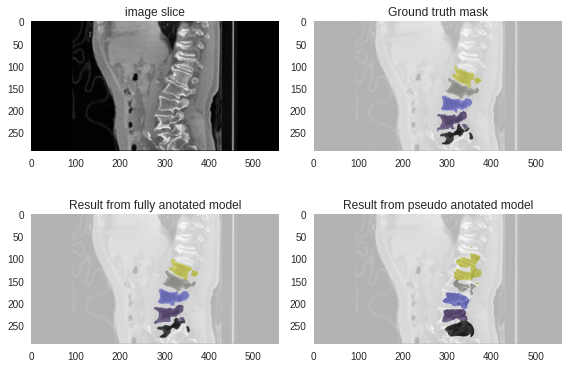

In [15]:
base_path = r'/media/jan/DataStorage/ProjectData/temp/'
result_folder_full = r'reconstruct_full'
result_folder_pseudo = r'reconstruct_pseudo'
dataset = r'dataset_2_contrast_3'
source = r'xVertSeg'
image_nr = 14
slice_nr = 260


mask_path = os.path.join(base_path, dataset,  f'{source}_masks', f'image{image_nr:03d}', 'mask_array.npy')
result_path_full = os.path.join(base_path, result_folder_full,  'dimension_2_split_test', f'scan_{source}_{image_nr:03d}_res.npy')
result_path_pseudo = os.path.join(base_path, result_folder_pseudo,  'dimension_2_split_test', f'scan_{source}_{image_nr:03d}_res.npy')
image_path = os.path.join(base_path, dataset, f'{source}_images', f'image{image_nr:03d}', f'slice_{slice_nr:03d}.jpg')


im = Image.open(image_path)
mask = np.take(np.load(mask_path), slice_nr, axis=2)
result_full = np.take(np.load(result_path_full), slice_nr, axis=2)
result_pseudo = np.take(np.load(result_path_pseudo), slice_nr, axis=2)

mask_im = Image.fromarray(np.uint8(cm.gist_stern_r(mask*51)*255)).convert('RGB')
mask_im = cv2.addWeighted(np.array(im), 0.3,np.array(mask_im), 0.7, 0)

result_full_im = Image.fromarray(np.uint8(cm.gist_stern_r(result_full*51)*255)).convert('RGB')
result_full_im = cv2.addWeighted(np.array(im), 0.3,np.array(result_full_im), 0.7, 0)

result_pseudo_im = Image.fromarray(np.uint8(cm.gist_stern_r(result_pseudo*51)*255)).convert('RGB')
result_pseudo_im = cv2.addWeighted(np.array(im), 0.3,np.array(result_pseudo_im), 0.7, 0)


plt.subplot(2,2,1)
plt.title('image slice')
plt.imshow(np.asarray(im))
plt.grid(False)
plt.subplot(2,2,2)
plt.imshow(mask_im)
plt.grid(False)
plt.title('Ground truth mask')
plt.subplot(2,2,3)
plt.imshow(result_full_im)
plt.grid(False)
plt.title('Result from fully anotated model')
plt.subplot(2,2,4)
plt.imshow(result_pseudo_im)
plt.grid(False)
plt.title('Result from pseudo anotated model')
plt.tight_layout()

plt.savefig(f'fullvsPseudo_{source}_{image_nr:03d}_{slice_nr:03d}.pdf', bbox_inches = 'tight')

In [11]:
grey = 0.925

def set_ax(ax):
    ax.patch.set_facecolor('white')
    ax.elev = 20
    ax.set_xlabel('left-right [mm]')
    ax.set_ylabel('anteroposterior [mm]')
    ax.set_zlabel('craniocaudal [mm]')
    set_axes_equal(ax)
    ax.w_xaxis.set_pane_color((grey, grey, grey, 1.0))
    ax.w_yaxis.set_pane_color((grey, grey, grey, 1.0))
    ax.w_zaxis.set_pane_color((grey, grey, grey, 1.0))

def plot_vol(ax, vol):
    visiblebox = vol != 0
    _ = ax.voxels(filled = visiblebox, facecolors = cm.gist_stern_r(vol*51), alpha=0.95)
    set_ax(ax)

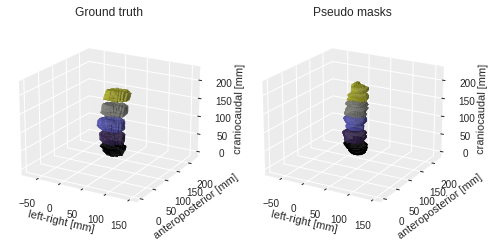

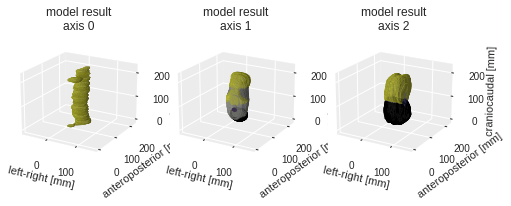

In [12]:
plt.style.use("seaborn-bright")

base_path = r'/media/jan/DataStorage/ProjectData/temp/'
dataset = r'dataset_2_contrast_3'
source = r'MyoSegmenTUM'
image_nr = 34
mask_path = os.path.join(base_path, dataset,  f'{source}_masks', f'image{image_nr:03d}', 'mask_array.npy')

reconstruct_path = r'reconstruct_from_precalc'
split = 'train'

s_dim_path = [
    os.path.join(base_path, 
                 reconstruct_path,  
                 f'dimension_{i}_split_{split}', 
                 f'scan_{source}_{image_nr:03d}_res.npy') for i in range(3)
]

result_comb_path =  os.path.join(base_path, 
                 reconstruct_path,  
                 'volumes', 
                 f'morphcombined_train_{source}_{image_nr:03d}.npy')

mask = np.rot90(np.load(mask_path), axes = (2,0))
s_dim = [np.rot90(np.load(s), axes=(2,0)) for s in s_dim_path]
result_comb = np.rot90(np.load(result_comb_path), axes = (2,0))

plt.figure(figsize = (8,8))
ax = plt.subplot(1,2,1, projection='3d')
plot_vol(ax, mask)
ax.set_title('Ground truth')

ax = plt.subplot(1,2,2, projection='3d')
plot_vol(ax,  result_comb)
ax.set_title('Pseudo masks')
plt.savefig(f'GroundTruth_morphComb_{source}_{image_nr:03d}.pdf', bbox_inches = 'tight')

plt.figure(figsize = (8, 8))
for i, s in enumerate(s_dim):
    ax = plt.subplot(1,3,i+1, projection='3d')
    plot_vol(ax,s)
    ax.set_title(f'model result\naxis {i}')
plt.savefig(f'SingleDims_{source}_{image_nr:03d}.pdf', bbox_inches = 'tight')

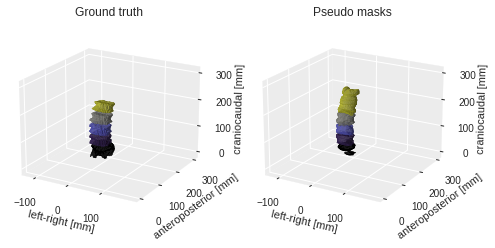

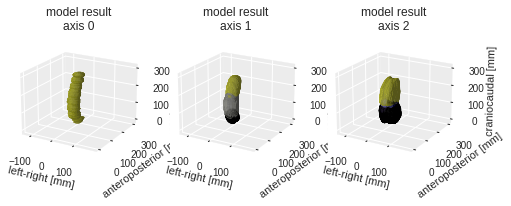

In [13]:
base_path = r'/media/jan/DataStorage/ProjectData/temp/'
dataset = r'dataset_2_contrast_3'
source = r'USiegen'
image_nr = 7
mask_path = os.path.join(base_path, dataset,  f'{source}_masks', f'image{image_nr:03d}', 'mask_array.npy')

reconstruct_path = r'reconstruct_from_precalc'
split = 'train'

s_dim_path = [
    os.path.join(base_path, 
                 reconstruct_path,  
                 f'dimension_{i}_split_{split}', 
                 f'scan_{source}_{image_nr:03d}_res.npy') for i in range(3)
]

result_comb_path =  os.path.join(base_path, 
                 reconstruct_path,  
                 'volumes', 
                 f'morphcombined_train_{source}_{image_nr:03d}.npy')

mask = np.rot90(np.load(mask_path), axes = (2,0))
s_dim = [np.rot90(np.load(s), axes=(2,0)) for s in s_dim_path]
result_comb = np.rot90(np.load(result_comb_path), axes = (2,0))

plt.figure(figsize = (8,8))
ax = plt.subplot(1,2,1, projection='3d')
plot_vol(ax, mask)
ax.set_title('Ground truth')

ax = plt.subplot(1,2,2, projection='3d')
plot_vol(ax, result_comb)
ax.set_title('Pseudo masks')
plt.savefig(f'GroundTruth_morphComb_{source}_{image_nr:03d}.pdf', bbox_inches = 'tight')

plt.figure(figsize = (8, 8))
for i, s in enumerate(s_dim):
    ax = plt.subplot(1,3,i+1, projection='3d')
    plot_vol(ax, s)
    ax.set_title(f'model result\naxis {i}')
plt.savefig(f'SingleDims_{source}_{image_nr:03d}.pdf', bbox_inches = 'tight')

Confusion matrix

In [14]:
base_path = r'/media/jan/DataStorage/ProjectData/temp/'
dataset = r'dataset_2_contrast_3'
source = r'USiegen'
image_nr = 12
mask_path = os.path.join(base_path, dataset,  f'{source}_masks', f'image{image_nr:03d}', 'mask_array.npy')

result_path = r'reconstruct_full'
result_path = os.path.join(base_path, result_path,  'dimension_2_split_test', f'scan_{source}_{image_nr:03d}_res.npy')

result = np.load(result_path)
mask = np.load(mask_path)

confusion_matrix(mask, result)

ValueError: unknown is not supported